In [2]:
# Dependencies

import pandas as pd 
from pathlib import Path
import requests
from pprint import pprint 
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
import re
import math
import random
from scipy import stats
from api_keys import weather_api_key
from api_keys import geoapify_key

# Turn off warning messages
import warnings
warnings.filterwarnings("ignore")

geoapify_key = "fe648b12323a445d862f26c85048ec07"
weather_api_key = "ceeacd1899d4c5549e093d6e219f0bfb"


ModuleNotFoundError: No module named 'pandas'

In [ ]:
# Store filepath in a variable 

covid19_file_1 = Path("Resources/us_counties_covid19_daily.csv")
covid19_file_2 = Path("Resources/county_info_city.csv")

In [ ]:
# Read our data files with the Pandas library

covid_df = pd.read_csv(covid19_file_1, encoding= "ISO-8859-1")
county_df =pd.read_csv(covid19_file_2, encoding="ISO-8859-1")

In [ ]:
# Show the first five rows

covid_df.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0


In [ ]:
# select rows in my season
# make a start date for december
# make a end date for december 

start_date = "2020-12-01"
end_date = "2020-12-31"


# make a start date for january-february 
# make a end date for january-febraury

start_date = "2020-01-01"
end_date = "2020-02-29"

# Select DataFrame rows between two dates
mask = (covid_df['date'] > start_date) & (covid_df['date'] <= end_date)
winter_covid_df = covid_df.loc[mask]

winter_covid_df



,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0
...,...,...,...,...,...,...
393,2020-02-29,Salt Lake,Utah,49035.0,1,0.0
394,2020-02-29,King,Washington,53033.0,4,1.0
395,2020-02-29,Snohomish,Washington,53061.0,2,0.0
396,2020-02-29,Spokane,Washington,53063.0,4,0.0


In [ ]:
# Combine Seat and State to get a city, state format
cols = ['Seat', 'State']
county_df['combined'] = county_df[cols].apply(lambda row: ', '.join(row.values.astype(str)), axis=1)

# Show new dataframe
county_df.head()

,State,County FIPS Code,County or Equivalent,Seat,combined
0,Alabama,1001,Autauga County,Prattville,"Prattville, Alabama"
1,Alabama,1003,Baldwin County,Bay Minette,"Bay Minette, Alabama"
2,Alabama,1005,Barbour County,Clayton,"Clayton, Alabama"
3,Alabama,1007,Bibb County,Centreville,"Centreville, Alabama"
4,Alabama,1009,Blount County,Oneonta,"Oneonta, Alabama"


In [ ]:
# Select 3 random cities from the county dataframe
harris_df = county_df.loc[county_df['County FIPS Code'] == 48201]
mericopa_df = county_df.loc[county_df['County FIPS Code'] == int('04013')]
king_df = county_df.loc[county_df['County FIPS Code'] == 53033]

random_cities_df = pd.concat([harris_df, mericopa_df, king_df])

# Show new dataframe
random_cities_df.head()

,State,County FIPS Code,County or Equivalent,Seat,combined
2617,Texas,48201,Harris County,Houston,"Houston, Texas"
92,Arizona,4013,Maricopa County,Phoenix,"Phoenix, Arizona"
2926,Washington,53033,King County,Seattle,"Seattle, Washington"


In [ ]:
# list of counties and cities 
counties_list = random_cities_df['County or Equivalent']
cities_list = random_cities_df['combined']
cities = []
counties = []
for city in cities_list:
    cities.append(city)
for county in counties_list:
    counties.append(county)

In [ ]:
# Set the API base URL
geo_url = "https://api.geoapify.com/v1/geocode/search"
weather_url = "https://api.openweathermap.org/data/3.0/onecall/timemachine?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []
city_hum_data = []

# Loop through all the cities in our list to fetch weather data
for city in cities:
    # Set up GeoApify parameters
    params = {
        "text": city,
        "apiKey": geoapify_key
    }

    # Run request
    geo_response = requests.get(geo_url, params=params).json()

    # Get latitude and longitude of each city
    lat = geo_response['features'][0]['geometry']['coordinates'][1]
    lon = geo_response['features'][0]['geometry']['coordinates'][0]

    # Get dates
    winter_dates = winter_covid_df['date'].unique()

    # Set up OpenWeather parameters
    temp =[]
    hum = []
    for date in winter_dates:
        unix_time = math.trunc(int(pd.Timestamp(date).timestamp()))
        url = f"{weather_url}lat={lat}&lon={lon}&dt={unix_time}&units={units}&appid={weather_api_key}"

        # Run request
        city_response = requests.get(url).json()

        # Get all 90 temperatures
        temp.append(city_response['data'][0]['temp'])
        
        # Get all 90 humidity values
        hum.append(city_response['data'][0]['humidity'])

        # Get all 90 humidity values
        #hum.append(city_response['data'][0]['humidity'])
    
    city_data.append({
            city: temp
        })
    
    city_hum_data.append({
            city: hum
        })  

KeyError: 'data'

In [ ]:
# Set the API base URL
geo_url = "https://api.geoapify.com/v1/geocode/search"
weather_url = "https://api.openweathermap.org/data/3.0/onecall/timemachine?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []
city_hum_data = []

# Loop through all the cities in our list to fetch weather data
for city in cities:
    # Set up GeoApify parameters
    params = {
        "text": city,
        "apiKey": geoapify_key }

    # Run request
    geo_response = requests.get(geo_url, params=params).json()

    # Get latitude and longitude of each city
    lat = geo_response['features'][0]['geometry']['coordinates'][1]
    lon = geo_response['features'][0]['geometry']['coordinates'][0]

    # Get dates
    winter_dates = winter_covid_df['date'].unique()

    # Set up OpenWeather parameters
    temp =[]
    hum = []
    for date in winter_dates:
        unix_time = math.trunc(int(pd.Timestamp(date).timestamp()))
        url = f"{weather_url}lat={lat}&lon={lon}&dt={unix_time}&units={units}&appid={weather_api_key}"
     
        # Run request
        city_response = requests.get(url).json()

      
        # Get all 90 temperatures
        temp.append(city_response['Data'][0]['temp'])
        
        # Get all 90 humidity values
        hum.append(city_response['Data'][0]['humidity'])

        # Get all 90 humidity values
        #hum.append(city_response['Data'][0]['humidity'])
    
    city_data.append({
            city: temp
        })
    
    city_hum_data.append({
            city: hum
        })  

KeyError: 'Data'

In [ ]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_hum_data_df = pd.DataFrame(city_hum_data)

In [ ]:
# Average cases per date
avg_cases_df = winter_covid_df.groupby(by=['date']).mean()

In [ ]:
# Reset index and combine average cases with the temperature data
avg_cases_df = avg_cases_df.reset_index()

In [ ]:
# Creating an exponential regress
x = [i for i in range(1,91)]
y = avg_cases_df['cases']
fit = np.polyfit(x, np.log(y), 1)
one =round(fit[0],2)
two = round(math.exp(fit[1]), 2)
line_eq = f"y = {two} * e ^ {one} x"
line = [two * (math.exp(one * i)) for i in x]

TypeError: expected x and y to have same length

ValueError: x and y must be the same size

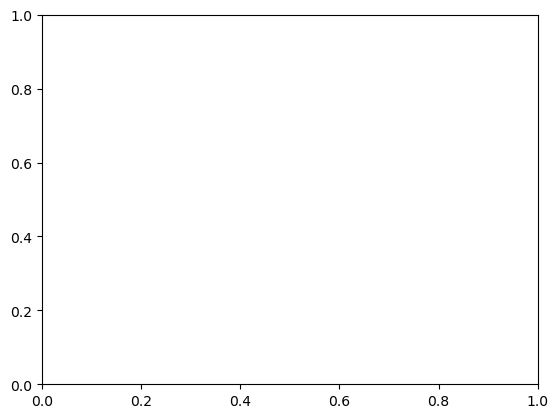

In [ ]:
# Ploting data
plt.scatter([i for i in range(1,91)], avg_cases_df['cases'])
plt.plot(x,line, color='red')
plt.annotate(line_eq, (0, 4000), color='red')
plt.xticks([0, 30, 60, 90], ['dec 1', 'jan 1', 'feb 1', 'feb 28'])
plt.xticks(rotation = 45)
plt.xlabel('Day')
plt.ylabel('Average COVID-19 Cases')
plt.title('Day vs Average COVID-19 Cases for all Counties')
plt.show()

ValueError: x and y must be the same size

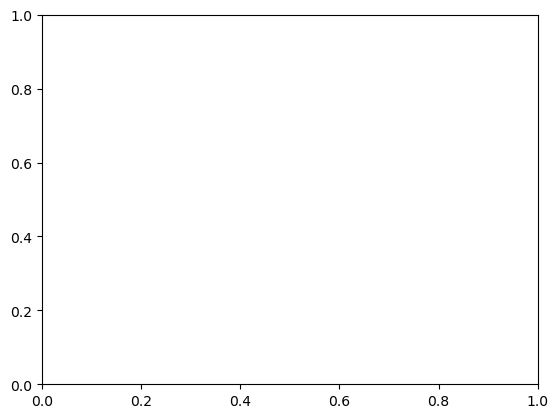

In [ ]:
# Ploting data
plt.scatter([i for i in range(1,91)], avg_cases_df['deaths'])
#plt.plot(x,line, color='red')
#plt.annotate(line_eq, (0, 4000), color='red')
plt.xticks([0, 30, 60, 90], ['dec 1', 'jan 1', 'feb 1', 'feb 28'])
plt.xticks(rotation = 45)
plt.xlabel('Day')
plt.ylabel('Average COVID-19 Deaths')
plt.title('Day vs Average COVID-19 Deaths for all Counties')
plt.show()

In [ ]:
# Show list of cities
cities

In [ ]:
# Show the counties the cites are in
counties

In [ ]:
# Calculate all of the first city's stats
city1_state = [state for state in random_cities_df['State']]
city1_county = counties[0].replace(" County", "")
city1_cases = winter_covid_df.loc[winter_covid_df['county']==city1_county]
city1_cases = city1_cases.loc[city1_cases['state']== city1_state[0]]
city1_cases = city1_cases['cases']
city1_deaths = winter_covid_df.loc[winter_covid_df['county']==city1_county]
city1_deaths = city1_deaths.loc[city1_deaths['state']== city1_state[0]]
city1_deaths = city1_deaths['deaths']
city1_temp = city_data_df[cities[0]][0]
city1_hum = city_hum_data_df[cities[0]][0]

# Calculate regression and line for city 1
p1_slope, p1_int, p1_r, p1_p, p1_std_err = stats.linregress(city1_temp, city1_cases)
p1_fit = [(p1_slope*i) + p1_int for i in city1_temp]
line1_equation = "y = " + str(round(p1_slope,2)) + "x + " + str(round(p1_int,2))

KeyError: 'Houston, Texas'

In [ ]:
# Calculate all of the second city's stats
city2_state = [state for state in random_cities_df['State']]
city2_county = counties[1].replace(" County", "")
city2_cases = winter_covid_df.loc[winter_covid_df['county']==city2_county]
city2_cases = city2_cases.loc[city2_cases['state']==city2_state[1]]
city2_cases = city2_cases['cases']
city2_deaths = winter_covid_df.loc[winter_covid_df['county']==city2_county]
city2_deaths = city2_deaths.loc[city2_deaths['state']==city2_state[1]]
city2_deaths = city2_deaths['deaths']
city2_temp = city_data_df[cities[1]][1]
city2_hum = city_hum_data_df[cities[1]][1]

# Calculate regression and line for city 2
p2_slope, p2_int, p2_r, p2_p, p2_std_err = stats.linregress(city2_temp, city2_cases)
p2_fit = [(p2_slope*i) + p2_int for i in city2_temp]
line2_equation = "y = " + str(round(p2_slope,2)) + "x + " + str(round(p2_int,2))

In [ ]:
# Calculate all of the third city's stats
city3_state = [state for state in random_cities_df['State']]
city3_county = counties[2].replace(" County", "")
city3_cases = winter_covid_df.loc[winter_covid_df['county']==city3_county]
city3_cases = city3_cases.loc[city3_cases['state']==city3_state[2]]
city3_cases = city3_cases['cases']
city3_deaths = winter_covid_df.loc[winter_covid_df['county']==city3_county]
city3_deaths = city3_deaths.loc[city3_deaths['state']==city3_state[2]]
city3_deaths = city3_deaths['deaths']
city3_temp = city_data_df[cities[2]][2]
city3_hum = city_hum_data_df[cities[2]][2]

# Calculate regression and line for city 3
p3_slope, p3_int, p3_r, p3_p, p3_std_err = stats.linregress(city3_temp, city3_cases)
p3_fit = [(p3_slope*i) + p3_int for i in city3_temp]
line3_equation = "y = " + str(round(p3_slope,2)) + "x + " + str(round(p3_int,2))

In [ ]:
# Generate a face plot of all 3 figures
fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True)
fig.suptitle("COVID-19 Cases vs. Temperature for Three Random Counties", fontweight="bold")

ax1.set_xlim(45, -5)
ax1.scatter(city1_temp, city1_cases, color='r', alpha=0.75, edgecolors='black')
ax1.plot(city1_temp, p1_fit, color="red")
#ax1.annotate(f"r-squared: {round(p1_r**2, 3)}", (30, 12000))
ax1.set_ylabel(counties[0])

ax2.scatter(city2_temp, city2_cases, color='b', alpha=0.75, edgecolors='black')
ax2.plot(city2_temp, p2_fit, color="blue")
#ax2.annotate(f"r-squared: {round(p2_r**2, 3)}", (30, 75000))
ax2.set_ylabel(counties[1])

ax3.scatter(city3_temp, city3_cases, color='g', alpha=0.75, edgecolors='black')
ax3.plot(city3_temp, p3_fit, color="green")
#ax3.annotate(f"r-squared: {round(p3_r**2, 3)}", (30, 3200))
ax3.set_ylabel(counties[2])
ax3.set_xlabel("Temperature (C) from Dec - Feb")

plt.savefig("winter_outputs/cases_vs_temp.png")
plt.show()

In [ ]:
# Generate a facet plot of all 3 figures
fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True)
fig.suptitle("COVID-19 Cases vs. Humidity for Three Random Counties", fontweight="bold")

ax1.set_xlim(0, 100)
ax1.scatter(city1_hum, city1_cases, color='r', alpha=0.75, edgecolors='black')
#ax1.plot(city1_temp, p1_fit, color="red")
#ax1.annotate(f"r-squared: {round(p1_r**2, 3)}", (30, 12000))
ax1.set_ylabel(counties[0])

ax2.scatter(city2_hum, city2_cases, color='b', alpha=0.75, edgecolors='black')
#ax2.plot(city2_temp, p2_fit, color="blue")
#ax2.annotate(f"r-squared: {round(p2_r**2, 3)}", (30, 75000))
ax2.set_ylabel(counties[1])

ax3.scatter(city3_hum, city3_cases, color='g', alpha=0.75, edgecolors='black')
#ax3.plot(city3_temp, p3_fit, color="green")
#ax3.annotate(f"r-squared: {round(p3_r**2, 3)}", (30, 3200))
ax3.set_ylabel(counties[2])
ax3.set_xlabel("Humidity (%) from dec - feb")

plt.savefig("winter_outputs/deaths_vs_temp.png")
plt.show()